<a href="https://colab.research.google.com/github/isakernir1/kerfislif/blob/main/production_envelopes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install rich==6.2.0
!pip install cobra
import cobra.test
from cobra import Model, Reaction, Metabolite
from cobra.util.solver import linear_reaction_coefficients
from cobra.flux_analysis import flux_variability_analysis
from cobra import sampling 

     |████████████████████████████████| 153kB 8.7MB/s 
     |████████████████████████████████| 51kB 5.8MB/s 
     |████████████████████████████████| 2.4MB 8.0MB/s 
     |████████████████████████████████| 51kB 6.6MB/s 
     |████████████████████████████████| 133kB 32.7MB/s 
     |████████████████████████████████| 71kB 8.5MB/s 
     |████████████████████████████████| 6.2MB 17.3MB/s 
     |████████████████████████████████| 2.1MB 51.4MB/s 
     |████████████████████████████████| 10.1MB 47.1MB/s 
     |████████████████████████████████| 102kB 10.2MB/s 
     |████████████████████████████████| 61kB 7.3MB/s 
     |████████████████████████████████| 552kB 44.0MB/s 
     |████████████████████████████████| 61kB 7.5MB/s 


In [ ]:
import numpy
import matplotlib, matplotlib.pyplot
# some matplotlib parameters to make figures look nice
matplotlib.rcParams.update({'font.size':20, 'font.family':'sans-serif', 'xtick.labelsize':20, 'ytick.labelsize':20, 'axes.labelsize':20})

In [ ]:
model = cobra.io.load_json_model('iIsor850.json')

In [ ]:
model.reactions.get_by_id("FUM_c").lower_bound = 0
model.reactions.get_by_id("FUM_c").upper_bound = 0
model.reactions.get_by_id("THRA_c").lower_bound = 0
model.reactions.get_by_id("THRA_c").upper_bound = 0

sol = model.optimize()

if sol.status != 'optimal':
  Vbio_max = 0
else:
  Vbio_max = sol.objective_value

print(Vbio_max)

0.9855615777673494


**0.9855615777673494 is the maximum growth rate when FUM_c and THRA_c are knocked out**

In [ ]:

model.objective = "EX_fum_e" #set objective to target given chemical
model.reactions.get_by_id('Biomass_Isor').lower_bound = Vbio_max
maximum = model.optimize(objective_sense='maximize').objective_value
minimum = model.optimize(objective_sense='minimize').objective_value

phenotype = [Vbio_max, minimum, maximum]
print(phenotype)

[0.9855615777673494, 0.7900320741071316, 0.7900320741078791]


**The numbers here above are the same as in the results from running all the double KOs (I did ths to make sure I was using the code correctly before finding the WT production rate)**

**Next I ran the same code, except for removing the two reactions (FUM_c and THRA_c, to see fumarate production in the WT model**

In [ ]:
modelWT = cobra.io.load_json_model('iIsor850.json')

In [ ]:
sol = modelWT.optimize()

if sol.status != 'optimal':
  Vbio_max = 0
else:
  Vbio_max = sol.objective_value

print(Vbio_max)

1.0331402662636093


In [ ]:
modelWT.objective = "EX_fum_e" #set objective to target given chemical
modelWT.reactions.get_by_id('Biomass_Isor').lower_bound = Vbio_max
maximum = modelWT.optimize(objective_sense='maximize').objective_value
minimum = modelWT.optimize(objective_sense='minimize').objective_value

phenotype = [Vbio_max, minimum, maximum]
print(phenotype)

[1.0331402662636093, 0.0, 8.198827152662102e-14]


**The WT production of fumarate is very low**

In [ ]:
model_fum_c = cobra.io.load_json_model('iIsor850.json')

In [ ]:
model_fum_c.reactions.get_by_id("FUM_c").lower_bound = 0
model_fum_c.reactions.get_by_id("FUM_c").upper_bound = 0

sol = model_fum_c.optimize()

if sol.status != 'optimal':
  Vbio_max = 0
else:
  Vbio_max = sol.objective_value

print(Vbio_max)

1.0074294546191318


In [ ]:
model_fum_c.objective = "EX_fum_e" #set objective to target given chemical
model_fum_c.reactions.get_by_id('Biomass_Isor').lower_bound = Vbio_max
maximum = model_fum_c.optimize(objective_sense='maximize').objective_value
minimum = model_fum_c.optimize(objective_sense='minimize').objective_value

phenotype = [Vbio_max, minimum, maximum]
print(phenotype)

[1.0074294546191318, 0.4457663776466847, 0.44576637765063076]


In [ ]:
model_THRA_c = cobra.io.load_json_model('iIsor850.json')

In [ ]:
model_THRA_c.reactions.get_by_id("THRA_c").lower_bound = 0
model_THRA_c.reactions.get_by_id("THRA_c").upper_bound = 0

sol = model_THRA_c.optimize()

if sol.status != 'optimal':
  Vbio_max = 0
else:
  Vbio_max = sol.objective_value

print(Vbio_max)

1.0331402662636033


In [ ]:
model_THRA_c.objective = "EX_fum_e" #set objective to target given chemical
model_THRA_c.reactions.get_by_id('Biomass_Isor').lower_bound = Vbio_max
maximum = model_THRA_c.optimize(objective_sense='maximize').objective_value
minimum = model_THRA_c.optimize(objective_sense='minimize').objective_value

phenotype = [Vbio_max, minimum, maximum]
print(phenotype)

[1.0331402662636033, 0.0, -1.0952160921326462e-13]


In [ ]:
model = cobra.io.load_json_model('iIsor850.json')
baseline_growth = model.optimize().objective_value
wild_xs = [] ; wild_ys = []
bm_range = numpy.linspace(0, baseline_growth, 100)
model.objective = "EX_fum_e"
for bm in bm_range:
  model.reactions.get_by_id('Biomass_Isor').lower_bound = bm
  model.reactions.get_by_id('Biomass_Isor').upper_bound = bm
  sol = model.optimize()
  if sol.status == 'optimal':
    wild_xs.append(bm)
    wild_ys.append(sol.objective_value)

In [ ]:
mins = []; maxs=[]
test_model = cobra.io.load_json_model('iIsor850.json')
#test_model.remove_reactions("FUM_c", "THRA_c")
sol_test = test_model.optimize().objective_value

sol_test_range = numpy.linspace(0, sol_test, 25)
test_model.objective = "EX_fum_e" 
for bm in sol_test_range:
  test_model.reactions.get_by_id('Biomass_Isor').lower_bound = bm
  maxs.append(test_model.optimize(objective_sense='maximize').objective_value)
  mins.append(test_model.optimize(objective_sense='minimize').objective_value)

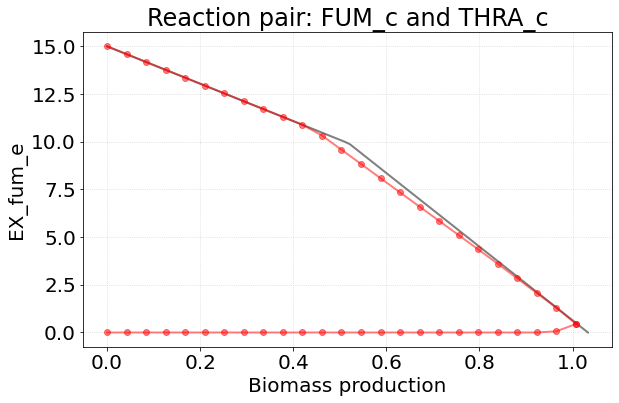

In [ ]:
matplotlib.pyplot.figure(figsize=(9, 6))

matplotlib.pyplot.plot(wild_xs, wild_ys, color='black', lw=2, alpha=0.5)
matplotlib.pyplot.plot(sol_test_range, mins, 'o-', color='red', lw=2, alpha=0.5)
matplotlib.pyplot.plot(sol_test_range, maxs, 'o-', color='red', lw=2, alpha=0.5)

matplotlib.pyplot.xlabel('Biomass production')
matplotlib.pyplot.ylabel('EX_fum_e')
matplotlib.pyplot.title('Reaction pair: ' + "FUM_c"+ ' and ' + "THRA_c")

matplotlib.pyplot.grid(alpha=0.5, ls=':')
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

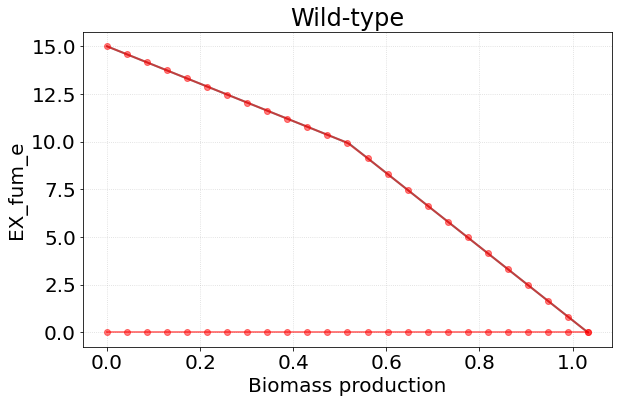

In [ ]:
matplotlib.pyplot.figure(figsize=(9, 6))

matplotlib.pyplot.plot(wild_xs, wild_ys, color='black', lw=2, alpha=0.5)
matplotlib.pyplot.plot(sol_test_range, mins, 'o-', color='red', lw=2, alpha=0.5)
matplotlib.pyplot.plot(sol_test_range, maxs, 'o-', color='red', lw=2, alpha=0.5)

matplotlib.pyplot.xlabel('Biomass production')
matplotlib.pyplot.ylabel('EX_fum_e')
matplotlib.pyplot.title("Wild-type")

matplotlib.pyplot.grid(alpha=0.5, ls=':')
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()